# Week4授業課題 信用情報の学習

### 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

- 何を学習し、何を予測するのか
  >クライアントの性別・家族有無・年収やローン与信額などの変数を学習し、返済能力の有無を予測する  
  >ターゲット変数
    - 1:支払が困難なクライアント：彼/彼女は私たちのサンプル
    - 0:ローンの最初のYの分割払いの少なくとも一方にX日以上延滞していた - 他のすべての場合
- どのようなファイルを作りKaggleに提出するか
  >SK_ID_CURR、	TARGETの2カラムを用意してcsv形式で提出
- 提出されたものはどういった指標値で評価されるのか
  >提出物は、予測された確率と観測された目標との間のROC曲線の下の面積で評価される

In [1]:
# Numpy
import numpy as np

# Dataframe operations
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scalers
from sklearn.preprocessing import StandardScaler

# Data Split
from sklearn.model_selection import train_test_split

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

# Linear-models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVC

# # Dicision Tree
# import pydotplus
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# from sklearn import datasets
# from IPython.display import Image

# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Tuning parameters
from sklearn.model_selection import GridSearchCV

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。


検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

#### 欠損値やオブジェクト型を全て数値にした後、全ての特徴量を使用

In [2]:
df = pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.shape

(307511, 122)

In [5]:
def missing_data(df):
    total = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns=['Total'])
    total = total[total['Total'] > 0]
    total['Percent'] = total['Total']/df.shape[0] * 100
    return total

missing_data(df)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [6]:
def dummy_variable_all(df, sort_frequence=True, dropna=True, map_show=False):
    """
    オブジェクト型の変数を数値へ一括変換する処理。
    
    Parameters
    ----------------
    df : pd.DataFrame
      データセットのDataFrame。
    sort_frequence : bool
      数値変換の順番を頻度順にするか
    dropna : bool
      nullを同様に数値へ変換するか
    map_show : bool
      変換するname mapを標準出力するか

    Returns
    ----------------
    df : pd.DataFrame
    """
    
    for column_name in df:
        if np.dtype(df[column_name]) == 'object':
            if sort_frequence:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_values(ascending=False).index
            else:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_index().index

            name_map = {}
            for i, value in enumerate(unique_value):
                name_map[value] = i
            if map_show:
                print('column_name :', column_name)
                print('replace :', name_map)
            df[column_name] = df[column_name].map(name_map)
        else:
            pass
    return df

In [7]:
df2 = dummy_variable_all(df, dropna=False, map_show=True)

column_name : NAME_CONTRACT_TYPE
replace : {'Cash loans': 0, 'Revolving loans': 1}
column_name : CODE_GENDER
replace : {'F': 0, 'M': 1, 'XNA': 2}
column_name : FLAG_OWN_CAR
replace : {'N': 0, 'Y': 1}
column_name : FLAG_OWN_REALTY
replace : {'Y': 0, 'N': 1}
column_name : NAME_TYPE_SUITE
replace : {'Unaccompanied': 0, 'Family': 1, 'Spouse, partner': 2, 'Children': 3, 'Other_B': 4, nan: 5, 'Other_A': 6, 'Group of people': 7}
column_name : NAME_INCOME_TYPE
replace : {'Working': 0, 'Commercial associate': 1, 'Pensioner': 2, 'State servant': 3, 'Unemployed': 4, 'Student': 5, 'Businessman': 6, 'Maternity leave': 7}
column_name : NAME_EDUCATION_TYPE
replace : {'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4}
column_name : NAME_FAMILY_STATUS
replace : {'Married': 0, 'Single / not married': 1, 'Civil marriage': 2, 'Separated': 3, 'Widow': 4, 'Unknown': 5}
column_name : NAME_HOUSING_TYPE
replace : {'House / apartment': 

In [8]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
missing_data(df2)

,Total,Percent
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
FLOORSMIN_AVG,208642,67.848630


In [10]:
df2.fillna(df2.mean(), inplace=True)
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,0,0,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,1,1,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,0,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,0,1,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [11]:
missing_data(df2)

,Total,Percent


In [12]:
df2.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'),
       dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('

In [13]:
X = df2.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = df2.loc[:, 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# ランダムフォレストクラスの初期化
clf = RandomForestClassifier()

# 学習
clf.fit(X_train, y_train)
#予測
y_pred = clf.predict_proba(X_test)
y_pred

array([[0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1]])

In [15]:
#評価
#roc_auc_score()に、正解ラベルと予測スコアを渡すとAUCを計算
from sklearn.metrics import roc_auc_score

print("ROC-AUCスコア:{}".format(roc_auc_score(y_test, y_pred[:, 1])))

ROC-AUCスコア:0.6364068086775279


### 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。

In [16]:
df_test = pd.read_csv('application_test.csv')
display(df_test)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [17]:
df_test.shape

(48744, 121)

In [18]:
df_test2 = dummy_variable_all(df_test, dropna=False, map_show=True)

column_name : NAME_CONTRACT_TYPE
replace : {'Cash loans': 0, 'Revolving loans': 1}
column_name : CODE_GENDER
replace : {'F': 0, 'M': 1}
column_name : FLAG_OWN_CAR
replace : {'N': 0, 'Y': 1}
column_name : FLAG_OWN_REALTY
replace : {'Y': 0, 'N': 1}
column_name : NAME_TYPE_SUITE
replace : {'Unaccompanied': 0, 'Family': 1, 'Spouse, partner': 2, nan: 3, 'Children': 4, 'Other_B': 5, 'Other_A': 6, 'Group of people': 7}
column_name : NAME_INCOME_TYPE
replace : {'Working': 0, 'Commercial associate': 1, 'Pensioner': 2, 'State servant': 3, 'Student': 4, 'Unemployed': 5, 'Businessman': 6}
column_name : NAME_EDUCATION_TYPE
replace : {'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4}
column_name : NAME_FAMILY_STATUS
replace : {'Married': 0, 'Single / not married': 1, 'Civil marriage': 2, 'Separated': 3, 'Widow': 4}
column_name : NAME_HOUSING_TYPE
replace : {'House / apartment': 0, 'With parents': 1, 'Municipal apartment': 2

In [19]:
df_test2.fillna(df_test2.mean(), inplace=True)
df_test2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,100005,0,1,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
2,100013,0,1,1,0,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
3,100028,0,0,0,0,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
4,100038,0,1,1,1,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769


In [20]:
missing_data(df_test2)

,Total,Percent


In [21]:
X2 = df_test2.drop(['SK_ID_CURR'], axis=1)
y_pred2 = clf.predict_proba(X2)
y_pred2[:, 1]

array([0. , 0.1, 0. , ..., 0.1, 0.1, 0.2])

In [22]:
submit = pd.concat([df_test2['SK_ID_CURR'], pd.Series(y_pred2[:, 1])], axis=1)
submit = submit.rename(columns={0: 'TARGET'})
display(submit)

,SK_ID_CURR,TARGET
0,100001,0.0
1,100005,0.1
2,100013,0.0
3,100028,0.0
4,100038,0.2
5,100042,0.0
6,100057,0.0
7,100065,0.0
8,100066,0.0
9,100067,0.0


In [23]:
submit.to_csv('kaggle.csv', index=False)

### 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。


- どの特徴量を使うか
- どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。


精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

In [24]:
#特徴量の重要度
importances = clf.feature_importances_
display(importances)

array([1.78977587e-03, 5.20794384e-03, 4.57706851e-03, 5.31556305e-03,
       7.50510130e-03, 2.70835597e-02, 3.10369591e-02, 3.25953528e-02,
       2.72028372e-02, 7.82606077e-03, 6.87079598e-03, 6.81671100e-03,
       1.04435568e-02, 5.70492067e-03, 2.69708076e-02, 3.82065698e-02,
       3.24913324e-02, 3.49760011e-02, 3.60344125e-02, 1.52860249e-02,
       0.00000000e+00, 1.45241850e-03, 4.83772023e-03, 3.45414040e-04,
       5.10414053e-03, 2.21811075e-03, 1.69790304e-02, 1.10687197e-02,
       4.24833183e-03, 4.85574121e-03, 1.79692679e-02, 2.34862994e-02,
       1.01319269e-03, 1.96459605e-03, 1.81259198e-03, 4.02916579e-03,
       4.06774424e-03, 4.63226872e-03, 1.90153045e-02, 2.85625234e-02,
       5.66312069e-02, 5.30740450e-02, 7.54069475e-03, 6.64726151e-03,
       7.85846055e-03, 5.36649925e-03, 5.34054402e-03, 3.05188551e-03,
       5.40114710e-03, 3.70062383e-03, 3.17658946e-03, 7.12891158e-03,
       4.86513664e-03, 8.48887013e-03, 2.74287991e-03, 5.83747002e-03,
      

In [25]:
importances.shape

(120,)

In [26]:
fe_importance = pd.DataFrame(importances, index=X.columns, columns=["importance_value"]).sort_values("importance_value", ascending = False)
display(fe_importance)

,importance_value
EXT_SOURCE_2,0.056631
EXT_SOURCE_3,0.053074
DAYS_BIRTH,0.038207
DAYS_ID_PUBLISH,0.036034
DAYS_REGISTRATION,0.034976
AMT_ANNUITY,0.032595
DAYS_EMPLOYED,0.032491
DAYS_LAST_PHONE_CHANGE,0.032287
AMT_CREDIT,0.031037
EXT_SOURCE_1,0.028563


/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


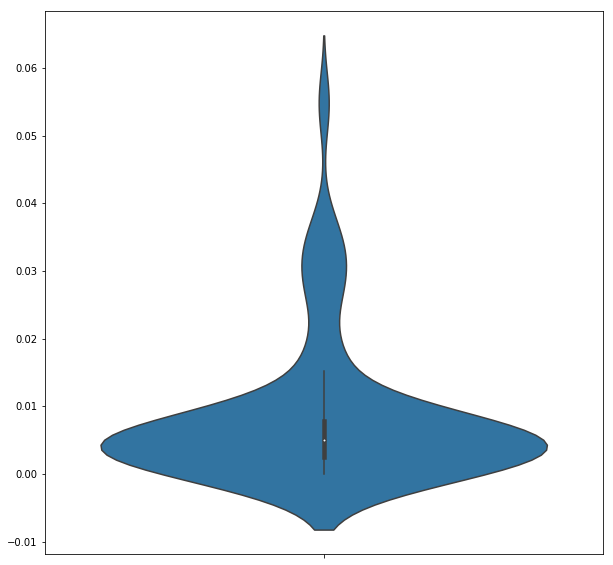

In [27]:
#バイオリン図

fig, axes = plt.subplots(1, 1, figsize=(10, 10))

sns.violinplot(y=fe_importance.loc[:, ["importance_value"]]) 

#### 重要度が0.02以上の特徴量の場合

In [28]:
fe_df = fe_importance.query("importance_value >= 0.02")
display(fe_df)

,importance_value
EXT_SOURCE_2,0.056631
EXT_SOURCE_3,0.053074
DAYS_BIRTH,0.038207
DAYS_ID_PUBLISH,0.036034
DAYS_REGISTRATION,0.034976
AMT_ANNUITY,0.032595
DAYS_EMPLOYED,0.032491
DAYS_LAST_PHONE_CHANGE,0.032287
AMT_CREDIT,0.031037
EXT_SOURCE_1,0.028563


In [29]:
fe_df.index

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'EXT_SOURCE_1',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [30]:
X3 = df2.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE']]
y3 = df2.loc[:, 'TARGET']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

In [31]:
# ランダムフォレストクラスの初期化
clf = RandomForestClassifier()

# 学習
clf.fit(X3_train, y3_train)
#予測
y_pred3 = clf.predict_proba(X3_test)
#評価
print("ROC-AUCスコア:{}".format(roc_auc_score(y3_test, y_pred3[:, 1])))

ROC-AUCスコア:0.6460247911350474


問題2のROC-AUCスコア：0.6364068086775279  
と比べてわずかに向上した。

#### 重要度が0.04以上の特徴量の場合

In [32]:
fe_df = fe_importance.query("importance_value >= 0.04")
display(fe_df)

,importance_value
EXT_SOURCE_2,0.056631
EXT_SOURCE_3,0.053074


In [33]:
X4 = df2.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3']]
y4 = df2.loc[:, 'TARGET']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

In [34]:
# ランダムフォレストクラスの初期化
clf = RandomForestClassifier()

# 学習
clf.fit(X4_train, y4_train)
#予測
y_pred4 = clf.predict_proba(X4_test)
#評価
print("ROC-AUCスコア:{}".format(roc_auc_score(y4_test, y_pred4[:, 1])))

ROC-AUCスコア:0.5755023964300731


問題2のROC-AUCスコア：0.6364068086775279  
と比べて精度は大きく落ちた。  
特徴量が少な過ぎるのはよくなさそう。

#### 前処理で全ての特徴量を標準化して使用した場合

In [35]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,0,0,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,1,1,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,0,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,0,1,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [36]:
missing_data(df2)

,Total,Percent


In [37]:
X = df2.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = df2.loc[:, 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scalerX_train = scaler.transform(X_train)
scalerX_test = scaler.transform(X_test)

display(scalerX_train)
print(scalerX_train.shape)

array([[-3.24069550e-01,  1.38803312e+00,  1.39375706e+00, ...,
        -3.13967041e-01,  1.29623310e+00, -1.09350643e+00],
       [-3.24069550e-01, -7.20354635e-01, -7.17485154e-01, ...,
        -3.13967041e-01,  1.29623310e+00, -5.17804661e-01],
       [ 3.08575737e+00, -7.20354635e-01, -7.17485154e-01, ...,
        -3.13967041e-01,  1.29623310e+00,  5.78971062e-02],
       ...,
       [ 3.08575737e+00,  1.38803312e+00, -7.17485154e-01, ...,
        -1.52255314e-04,  2.94596650e-03,  3.12211898e-04],
       [-3.24069550e-01,  1.38803312e+00,  1.39375706e+00, ...,
        -3.13967041e-01, -4.64477067e-01, -1.09350643e+00],
       [-3.24069550e-01, -7.20354635e-01, -7.17485154e-01, ...,
        -3.13967041e-01, -4.64477067e-01,  1.78500241e+00]])

(215257, 120)


In [39]:
# ランダムフォレストクラスの初期化
clf = RandomForestClassifier()

# 学習
clf.fit(scalerX_train, y_train)
#予測
y_pred = clf.predict_proba(scalerX_test)
#評価
print("ROC-AUCスコア:{}".format(roc_auc_score(y_test, y_pred[:, 1])))

ROC-AUCスコア:0.6366573394437418


In [40]:
#特徴量の重要度
importances = clf.feature_importances_

fe_importance = pd.DataFrame(importances, index=X.columns, columns=["importance_value"]).sort_values("importance_value", ascending = False)
display(fe_importance)

,importance_value
EXT_SOURCE_2,0.055350
EXT_SOURCE_3,0.050671
DAYS_BIRTH,0.037134
DAYS_ID_PUBLISH,0.036405
DAYS_REGISTRATION,0.035167
DAYS_EMPLOYED,0.033301
AMT_ANNUITY,0.032311
DAYS_LAST_PHONE_CHANGE,0.032178
AMT_CREDIT,0.029963
AMT_INCOME_TOTAL,0.028496


/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


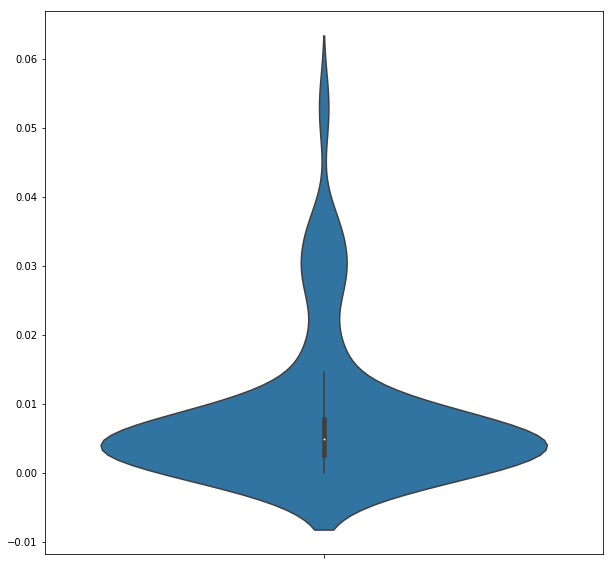

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

sns.violinplot(y=fe_importance.loc[:, ["importance_value"]]) 

問題2のROC-AUCスコア：0.6364068086775279  
と比べて非常にわずかに精度が向上した。  
全ての特徴量を単純に標準化しただけでは特に意味がなさそう。

#### 重要度が0.02以上の特徴量（標準化を行う）の場合

In [42]:
fe_df = fe_importance.query("importance_value >= 0.02")
display(fe_df)

,importance_value
EXT_SOURCE_2,0.055350
EXT_SOURCE_3,0.050671
DAYS_BIRTH,0.037134
DAYS_ID_PUBLISH,0.036405
DAYS_REGISTRATION,0.035167
DAYS_EMPLOYED,0.033301
AMT_ANNUITY,0.032311
DAYS_LAST_PHONE_CHANGE,0.032178
AMT_CREDIT,0.029963
AMT_INCOME_TOTAL,0.028496


In [43]:
fe_df.index

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'AMT_ANNUITY',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'EXT_SOURCE_1', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [44]:
X = df2.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'EXT_SOURCE_1', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START']]
y = df2.loc[:, 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)

scalerX_train = scaler.transform(X_train)
scalerX_test = scaler.transform(X_test)

# ランダムフォレストクラスの初期化
clf = RandomForestClassifier()

# 学習
clf.fit(scalerX_train, y_train)
#予測
y_pred = clf.predict_proba(scalerX_test)
#評価
print("ROC-AUCスコア:{}".format(roc_auc_score(y_test, y_pred[:, 1])))

ROC-AUCスコア:0.6408344098619672


問題2のROC-AUCスコア：0.6364068086775279   
と比べてわずかに精度が向上した。  

#### 上記で重要度が0.02以上の特徴量と目的変数との相関関係の高いもので特徴量をさらに絞ってみる（標準化は行う）

In [46]:
df2_ = df2.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'EXT_SOURCE_1', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', "TARGET"]]

In [47]:
df2_.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,EXT_SOURCE_1,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,TARGET
0,0.262949,0.139376,-2120,-9461,-3648.0,24700.5,-637,-1134.0,406597.5,202500.0,0.083037,0.018801,351000.0,10,1
1,0.622246,0.510853,-291,-16765,-1186.0,35698.5,-1188,-828.0,1293502.5,270000.0,0.311267,0.003541,1129500.0,11,0
2,0.555912,0.729567,-2531,-19046,-4260.0,6750.0,-225,-815.0,135000.0,67500.0,0.502130,0.010032,135000.0,9,0
3,0.650442,0.510853,-2437,-19005,-9833.0,29686.5,-3039,-617.0,312682.5,135000.0,0.502130,0.008019,297000.0,17,0
4,0.322738,0.510853,-3458,-19932,-4311.0,21865.5,-3038,-1106.0,513000.0,121500.0,0.502130,0.028663,513000.0,11,0


In [48]:
scaler = StandardScaler()
df2_scaler = scaler.fit_transform(df2_)

df2_scaler =pd.DataFrame(df2_scaler,columns=df2_.columns)
df2_scaler.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,EXT_SOURCE_1,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,TARGET
0,-1.317463,-2.129249e+00,0.579154,1.506880,0.379837,-0.166149,-0.456215,-0.206991,-0.478095,0.142129,-3.006518e+00,-0.149452,-0.507465,-0.631821,3.374485
1,0.565106,2.138178e-13,1.790855,-0.166821,1.078697,0.592677,-0.460115,0.163108,1.725450,0.426792,-1.369223e+00,-1.252750,1.600698,-0.325620,-0.296342
2,0.217545,1.253633e+00,0.306869,-0.689509,0.206116,-1.404676,-0.453299,0.178831,-1.152888,-0.427196,-1.592919e-15,-0.783451,-1.092389,-0.938022,-0.296342
3,0.712841,2.138178e-13,0.369143,-0.680114,-1.375829,0.177869,-0.473217,0.418307,-0.711430,-0.142533,-1.592919e-15,-0.928991,-0.653696,1.511587,-0.296342
4,-1.004190,2.138178e-13,-0.307263,-0.892535,0.191639,-0.361755,-0.473210,-0.173126,-0.213734,-0.199466,-1.592919e-15,0.563570,-0.068772,-0.325620,-0.296342


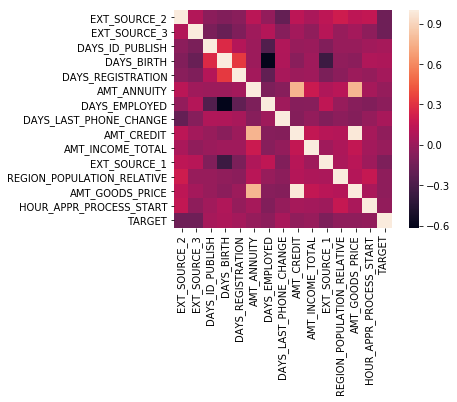

In [50]:
#相関行列を作成
corr_matrix = df2_scaler.corr()

sns.heatmap(corr_matrix,
            square=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [51]:
corr_y = pd.DataFrame({"features":df2_scaler.columns,"target":corr_matrix["TARGET"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,target
0,EXT_SOURCE_2,-0.160303
1,EXT_SOURCE_3,-0.157397
2,DAYS_ID_PUBLISH,0.0514572
3,DAYS_BIRTH,0.0782393
4,DAYS_REGISTRATION,0.0419749
5,AMT_ANNUITY,-0.0128165
6,DAYS_EMPLOYED,-0.0449317
7,DAYS_LAST_PHONE_CHANGE,0.0552185
8,AMT_CREDIT,-0.0303693
9,AMT_INCOME_TOTAL,-0.00398187


In [52]:
select_cols = corr_y[corr_y["target"].abs()>0.04]
select_cols = list(select_cols["features"])
 
#特徴選択後のデータ
df_new = df.loc[:,select_cols]
df_new.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,TARGET
0,0.262949,0.139376,-2120,-9461,-3648.0,-637,-1134.0,0.083037,1
1,0.622246,0.510853,-291,-16765,-1186.0,-1188,-828.0,0.311267,0
2,0.555912,0.729567,-2531,-19046,-4260.0,-225,-815.0,0.502130,0
3,0.650442,0.510853,-2437,-19005,-9833.0,-3039,-617.0,0.502130,0
4,0.322738,0.510853,-3458,-19932,-4311.0,-3038,-1106.0,0.502130,0


In [55]:
X = df_new.drop(["TARGET"], axis=1)
y = df_new.loc[:, 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ランダムフォレストクラスの初期化
clf = RandomForestClassifier()

# 学習
clf.fit(scalerX_train, y_train)
#予測
y_pred = clf.predict_proba(scalerX_test)
#評価
print("ROC-AUCスコア:{}".format(roc_auc_score(y_test, y_pred[:, 1])))

ROC-AUCスコア:0.6406827048414877


問題2のROC-AUCスコア：0.6364068086775279  
と比べてわずかに精度が向上した。  
新しい特徴量を作らないと劇的な精度向上には繋がらなさそう。